In [1]:
!pip install gql


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 10.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import random
from sys import getsizeof
import gql
import os
import matplotlib.pyplot as plt
import seaborn as sns
import shutil

import warnings
warnings.filterwarnings('ignore')

In [3]:
#load data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
review_data = pd.read_csv('/content/drive/My Drive/yelp_dataset/Final_Data/review_table.csv')


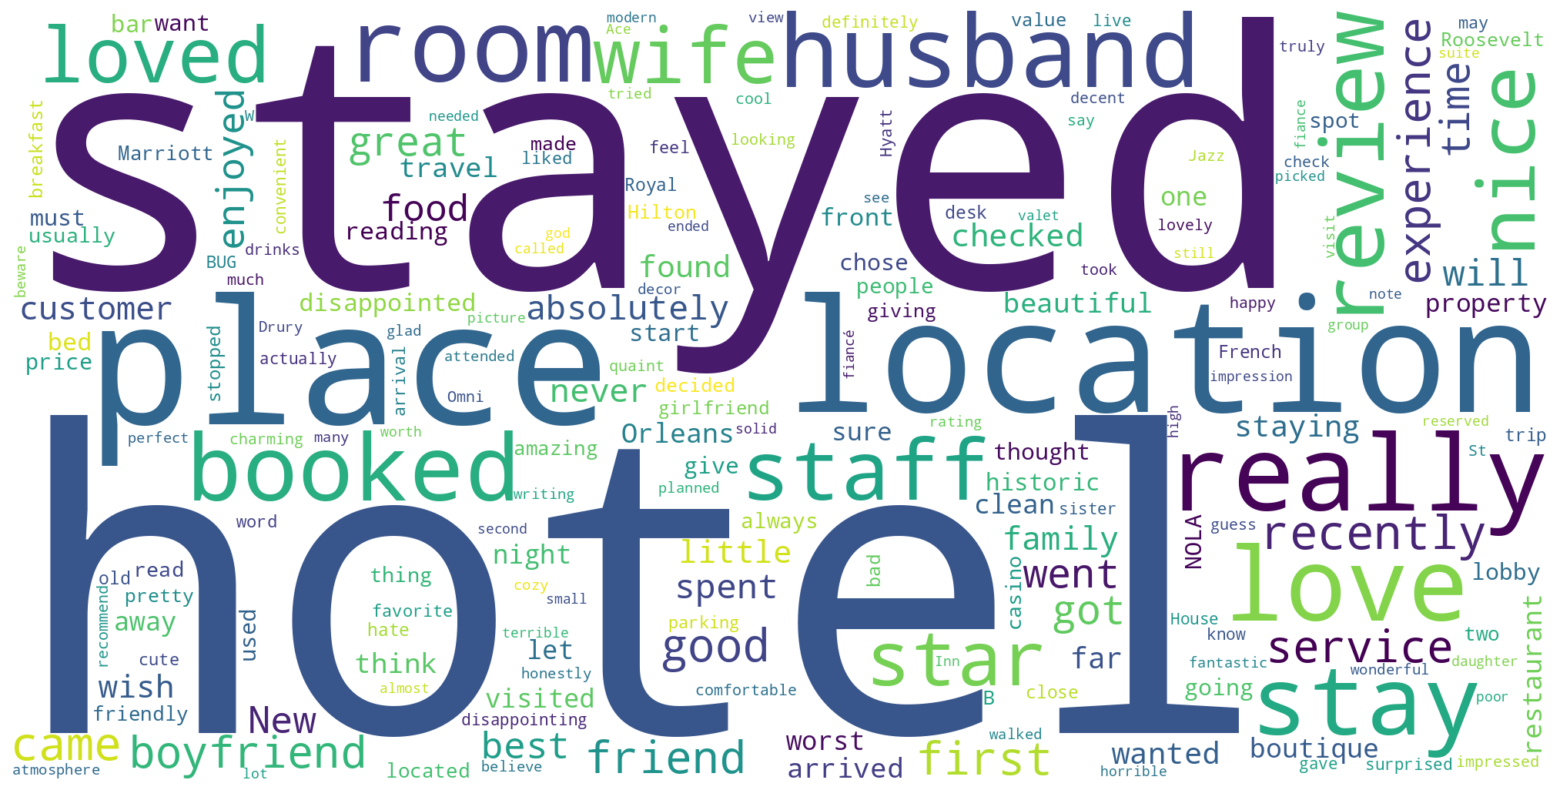

In [5]:
from wordcloud import WordCloud
plt.figure(figsize=(20,10))
#Creating the text variable
textWordCloudBefore = " ".join(cat.split()[1] for cat in review_data.text)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white', width=2000, height=1000).generate(textWordCloudBefore)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Removing Punctuation

In [6]:
import string
string.punctuation

processedreview_data = review_data.copy()
processedreview_data.reset_index(drop=True, inplace=True)

#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    punctuationfree="".join([i for i in punctuationfree if i not in ['\n', '\t', '\b']])
    return punctuationfree
#storing the puntuation free text
processedreview_data['text_punct_reml']= processedreview_data['text'].apply(lambda x:remove_punctuation(x))
processedreview_data['text_punct_reml']

0        This hotel is bad borderline mediocre Of cours...
1        Had booked rooms a month in advance for a bach...
2        This hotel seems very nice in the lobby but th...
3        Understand first that this was a party trip wi...
4        A group of 12 girls and I came here for a Bach...
                               ...                        
16197    I am very glad that I stayed here on my recent...
16198    We booked this hotel for me and my bestie to s...
16199    Since this hotel is right across the street fr...
16200    We stayed at the Hilton New Orleans Riverside ...
16201    Update timein town for the Yelpy Awards and ne...
Name: text_punct_reml, Length: 16202, dtype: object

#Lowering the text



In [7]:
processedreview_data['text_lower']= processedreview_data['text_punct_reml'].apply(lambda x: x.lower())

# Language Detection

In [8]:
!pip install langdetect


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=2df51ace3794492418fe6d5344b215425b8c99a4c0f060e9918fe8630659bc7b
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [9]:
import langdetect

languages_langdetect = []

# the try except blook because there is some tweets contain links
for line in processedreview_data['text_lower']:
    try:
        result = langdetect.detect_langs(line)
        result = str(result[0])[:2]
    except:
        result = 'unknown'

    finally:
        languages_langdetect.append(result)

processedreview_data['languages']=languages_langdetect

processedreview_data['languages'].unique()

array(['en', 'ro', 'fr', 'de', 'es', 'it', 'tr'], dtype=object)

In [10]:
for l in processedreview_data['languages'].unique():
    if l != 'en':
        print(processedreview_data[(processedreview_data['languages']==l)].text)

809    Great location, clean, beautiful art, great pr...
Name: text, dtype: object
1941     Beautiful, historic hotel. Excellent location....
4861     L'hotel est idealement situe pour visiter la n...
5588     Hôtel Particulièrement agréable, un toit terra...
8886     Très bel endroit: les chambres sont bien tenue...
15945    Petit séjour à la Nouvelle-Orléans, comme nois...
16171    Petit séjour à la Nouvelle-Orléans, comme nous...
Name: text, dtype: object
5899     Das Pelham Hotel habe ich wegen seiner Nähe zu...
10553    Mein Vater war früher schon einige male in New...
14903    Gute Lage, moderne Zimmer und sehr viele Parkm...
Name: text, dtype: object
6278    Very nice hotel and very kind staff, everythin...
8418    El Royal St. Charles es de esos hoteles correc...
Name: text, dtype: object
9623    Hotel che dispone di camere con cucina, pulito...
Name: text, dtype: object
11382    French Quarter (Fransız Mahallesi) yakınlarınd...
11540    Bir kongre sırasında kaldım. İyi bir ote

In [11]:
# Count the number of rows with languages other than English
non_english_rows = processedreview_data[processedreview_data['languages'] != 'en'].shape[0]

# Print the count
print("Number of rows with languages other than English:", non_english_rows)


Number of rows with languages other than English: 15


In [12]:
for l in processedreview_data['languages'].unique():
        if l != 'en':
                processedreview_data.drop(processedreview_data[(processedreview_data['languages']==l)].index, axis=0, inplace=True)

processedreview_data.reset_index(inplace=True)

# Stop Word Removal

In [13]:
# Cleaning the texts
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import STOPWORDS

def cleaningText(text):
    sentences = nltk.sent_tokenize(text)
    review = ""
    for i in range(len(sentences)):
        review = re.sub('[^a-zA-Z]', ' ', sentences[i])
        review = review.split()
        review = [word for word in review if not word.lower() in set(stopwords.words('english'))]
        review = [word for word in review if not word.lower() in set(STOPWORDS)]
        for x in review:
            if x.lower() == 'i':
                print(x)
        review = ' '.join(review)
    return review

processedreview_data['cleanText'] = processedreview_data['text_lower'].apply(lambda x : cleaningText(x))
processedreview_data['cleanText']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0        hotel bad borderline mediocre course hotel rem...
1        booked rooms month advance bachelor party wait...
2        hotel nice lobby rooms subpar located th floor...
3        understand party trip buddies reviewing hotel ...
4        group girls came bachelorette party bedroom in...
                               ...                        
16182    glad stayed recent trip new orleans got great ...
16183    booked hotel bestie stay week visiting nola pl...
16184    hotel right street convention center opted sta...
16185    stayed hilton new orleans riverside essence fe...
16186    update timein town yelpy awards needed room ni...
Name: cleanText, Length: 16187, dtype: object

#Lemmatization, Tokenization and removal of neutral words

In [14]:
!python -m spacy download en_core_web_lg


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [15]:
import nltk
nltk.download('averaged_perceptron_tagger')
import spacy
from spacy.lang.en import stop_words as spacy_stopwords
stop_words = spacy_stopwords.STOP_WORDS
nlp = spacy.load('en_core_web_lg')
extraStopwords = ['ve', 'll', 'm', 's', 'd', 'ny', 'st', 'woo', 'n', 'ish']
neutralTags = ['NN', 'NNP', 'NNS', 'NNPS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'PRP', 'WP', 'RB', 'RBR', 'RBS', 'IN', 'DT', 'CC']
initialTags = ['ADV', 'NOUN', 'VERB', 'PROPN', 'PRON', 'AUX', 'CCONJ', 'PART', 'SYM', 'SPACE', 'PUNCT', 'DET', 'CONJ', 'X']


# lemmatization
processedreview_data['text_lemmatized']=processedreview_data['cleanText'].apply(lambda x:[token.lemma_ for token in nlp(x) if token.pos_ not in initialTags])

# rechecking for the stopwords
processedreview_data['text_lemmatized'] = processedreview_data['text_lemmatized'].apply(lambda p:[x for x in p if str(x.lower()) not in set(STOPWORDS) and str(x.lower()) not in stop_words and str(x.lower()) not in extraStopwords])

# rechecking the neutral words
processedreview_data['text_lemmatized'] = processedreview_data['text_lemmatized'].apply(lambda t: [token for token in t if nltk.pos_tag([token])[0][1] not in neutralTags])


processedreview_data['text_lemmatized']

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


0        [bad, manageable, difficult, inaccessible, new...
1                                         [ready, willing]
2        [nice, small, positive, fantastic, quiet, ridi...
3        [little, little, little, great, live, solid, u...
4             [little, huge, big, french, easy, nice, new]
                               ...                        
16182    [recent, great, comfortable, good, easy, parti...
16183    [safe, limited, low, black, main, easy, identi...
16184    [attentive, nice, large, chinese, stupid, upsc...
16185             [nice, southern, expensive, daily, nice]
16186     [major, conventionusual, great, spacious, great]
Name: text_lemmatized, Length: 16187, dtype: object

In [16]:
# lemmatization
initialTagsLDA = ['ADV', 'PRON', 'AUX', 'CCONJ', 'PART', 'SYM', 'SPACE', 'PUNCT', 'DET', 'CONJ', 'X', 'ADJ']
processedreview_data['token_lda']=processedreview_data['cleanText'].apply(lambda x:[token.lemma_ for token in nlp(x) if token.pos_ not in initialTagsLDA])

# rechecking for the stopwords
processedreview_data['token_lda'] = processedreview_data['token_lda'].apply(lambda p:[x for x in p if str(x.lower()) not in set(STOPWORDS) and str(x.lower()) not in stop_words and str(x.lower()) not in extraStopwords])

processedreview_data['token_lda']

0        [hotel, borderline, course, hotel, remain, con...
1        [book, room, month, advance, bachelor, party, ...
2        [hotel, lobby, room, locate, floor, elevator, ...
3        [understand, party, trip, buddy, review, hotel...
4        [group, girl, come, bachelorette, party, bedro...
                               ...                        
16182    [glad, stay, trip, new, orleans, room, rate, f...
16183    [book, hotel, bestie, stay, week, visit, nola,...
16184    [hotel, right, street, convention, center, opt...
16185    [stay, hilton, new, orleans, riverside, essenc...
16186    [update, timein, town, yelpy, award, need, roo...
Name: token_lda, Length: 16187, dtype: object

# Checking words and frequencies

In [17]:
from collections import Counter

def get_all_lemmas(data):
    all_lemmas = []
    for tokens in data:
        all_lemmas.extend(tokens)
    return all_lemmas

all_lemmas = get_all_lemmas(processedreview_data.text_lemmatized)

# Count
lemmas_freq = Counter(all_lemmas)
common_lemmas = lemmas_freq.most_common(100)
print (common_lemmas, len(common_lemmas))

[('great', 8832), ('good', 7573), ('nice', 7084), ('french', 4725), ('small', 3477), ('little', 3011), ('old', 2624), ('free', 2595), ('bad', 2530), ('comfortable', 2402), ('big', 1968), ('new', 1932), ('hot', 1680), ('large', 1649), ('quiet', 1472), ('high', 1221), ('able', 1211), ('different', 1170), ('huge', 1140), ('happy', 1092), ('available', 1039), ('open', 1030), ('second', 1008), ('ready', 979), ('extra', 973), ('overall', 960), ('spacious', 953), ('easy', 914), ('entire', 896), ('short', 860), ('modern', 860), ('safe', 803), ('fresh', 798), ('fantastic', 702), ('main', 701), ('special', 677), ('tiny', 626), ('local', 623), ('expensive', 611), ('low', 594), ('horrible', 570), ('busy', 558), ('terrible', 531), ('gorgeous', 519), ('wrong', 484), ('hard', 477), ('real', 464), ('poor', 453), ('attentive', 400), ('disappointed', 399), ('single', 399), ('black', 366), ('reasonable', 354), ('professional', 348), ('major', 346), ('private', 338), ('white', 323), ('negative', 320), ('s

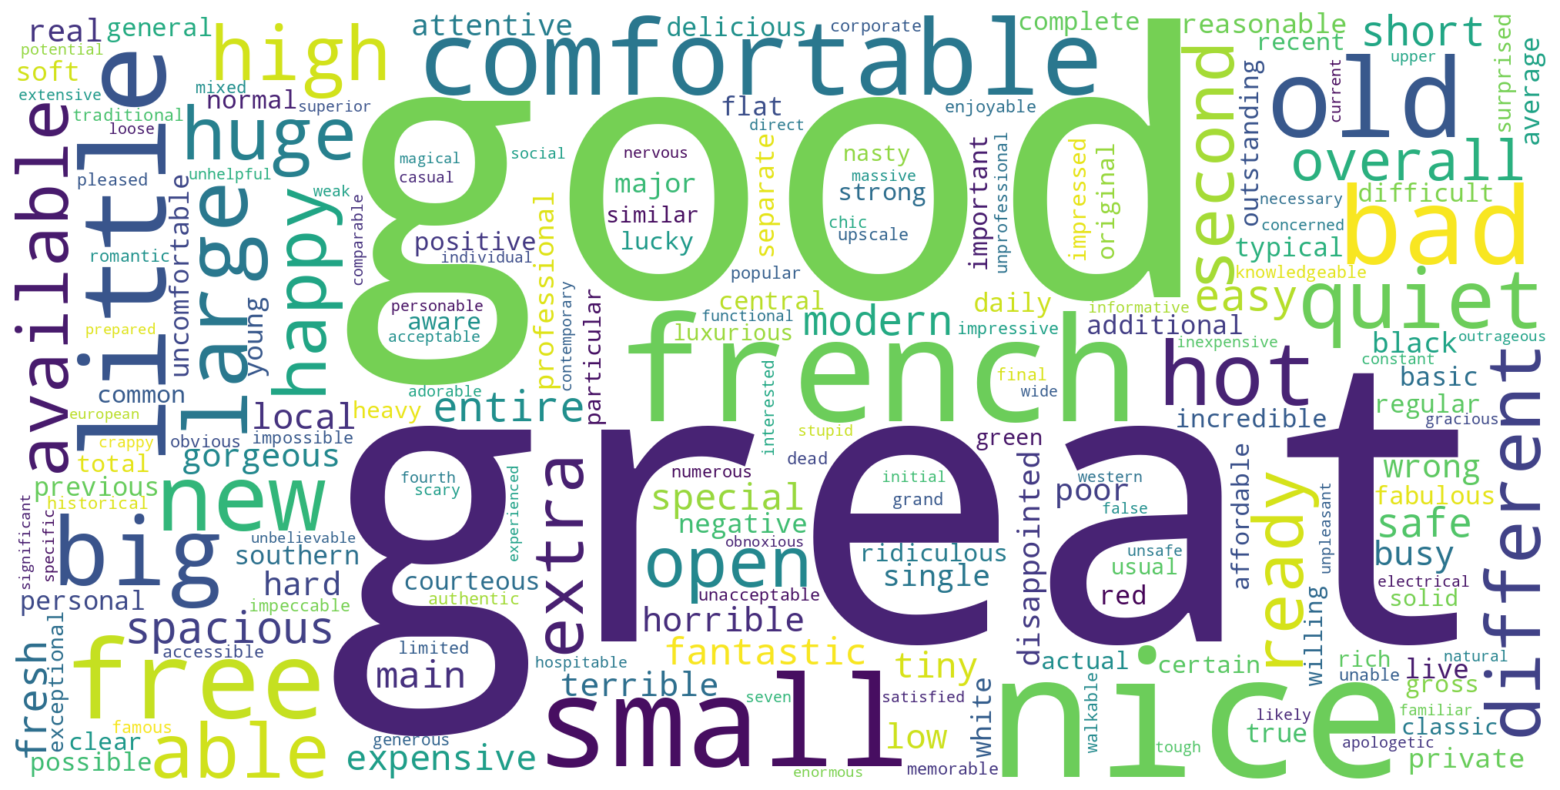

In [18]:
plt.figure(figsize=(20,10))
#Creating the text variable
textWordCloudAfter = " ".join(cat for cat in processedreview_data['text_lemmatized'].apply(lambda review: ' '.join(review)))
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white', width=2000, height=1000).generate(textWordCloudAfter)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
# Split the DataFrame based on the value of "is_open" column
open_businesses = processedreview_data[processedreview_data['is_open'] == 1]
closed_businesses = processedreview_data[processedreview_data['is_open'] == 0]

# Now, open_businesses contains all rows where "is_open" is 1, and closed_businesses contains all rows where "is_open" is 0


#Topic Modelling with LDA (Latent Dirichlet Allocation)

In [49]:
from gensim.models import ldamodel
from gensim.corpora.dictionary import Dictionary

dictionary = Dictionary(open_businesses['token_lda'])
corpus_bow = [dictionary.doc2bow(text) for text in open_businesses['token_lda']]

In [50]:
[[(dictionary[id], freq) for id, freq in cp] for cp in corpus_bow[:1]]

[[('ac', 1),
  ('borderline', 1),
  ('clean', 1),
  ('come', 1),
  ('construction', 1),
  ('course', 1),
  ('desk', 2),
  ('elevator', 2),
  ('engineer', 1),
  ('exercise', 1),
  ('facility', 1),
  ('fix', 1),
  ('floor', 2),
  ('heart', 1),
  ('help', 1),
  ('hotel', 3),
  ('hour', 1),
  ('inconvenience', 1),
  ('issue', 1),
  ('key', 2),
  ('locate', 1),
  ('location', 1),
  ('money', 1),
  ('place', 1),
  ('pool', 1),
  ('purpose', 1),
  ('quaint', 1),
  ('quarter', 1),
  ('remain', 2),
  ('replace', 1),
  ('restaurant', 1),
  ('room', 5),
  ('save', 1),
  ('serve', 1),
  ('service', 1),
  ('sleep', 1),
  ('spend', 1),
  ('stair', 1),
  ('stay', 1),
  ('time', 1),
  ('towelssoap', 1),
  ('unit', 1),
  ('work', 1)]]

In [51]:
ldaTopicNum = 15

In [52]:
lda_model = ldamodel.LdaModel(corpus=corpus_bow, # Stream of document vectors or sparse matrix of shape (num_documents, num_terms)
                                id2word=dictionary, # Mapping from word IDs to words. It is used to determine the vocabulary size, as well as for debugging and topic printing.
                                num_topics=ldaTopicNum, # The number of requested latent topics to be extracted from the training corpus.
                                passes=10, #Number of passes through the corpus during training
                                per_word_topics=True) # computes a list of topics, sorted in descending order of most likely topics for each word, along with their phi values multiplied by the feature length

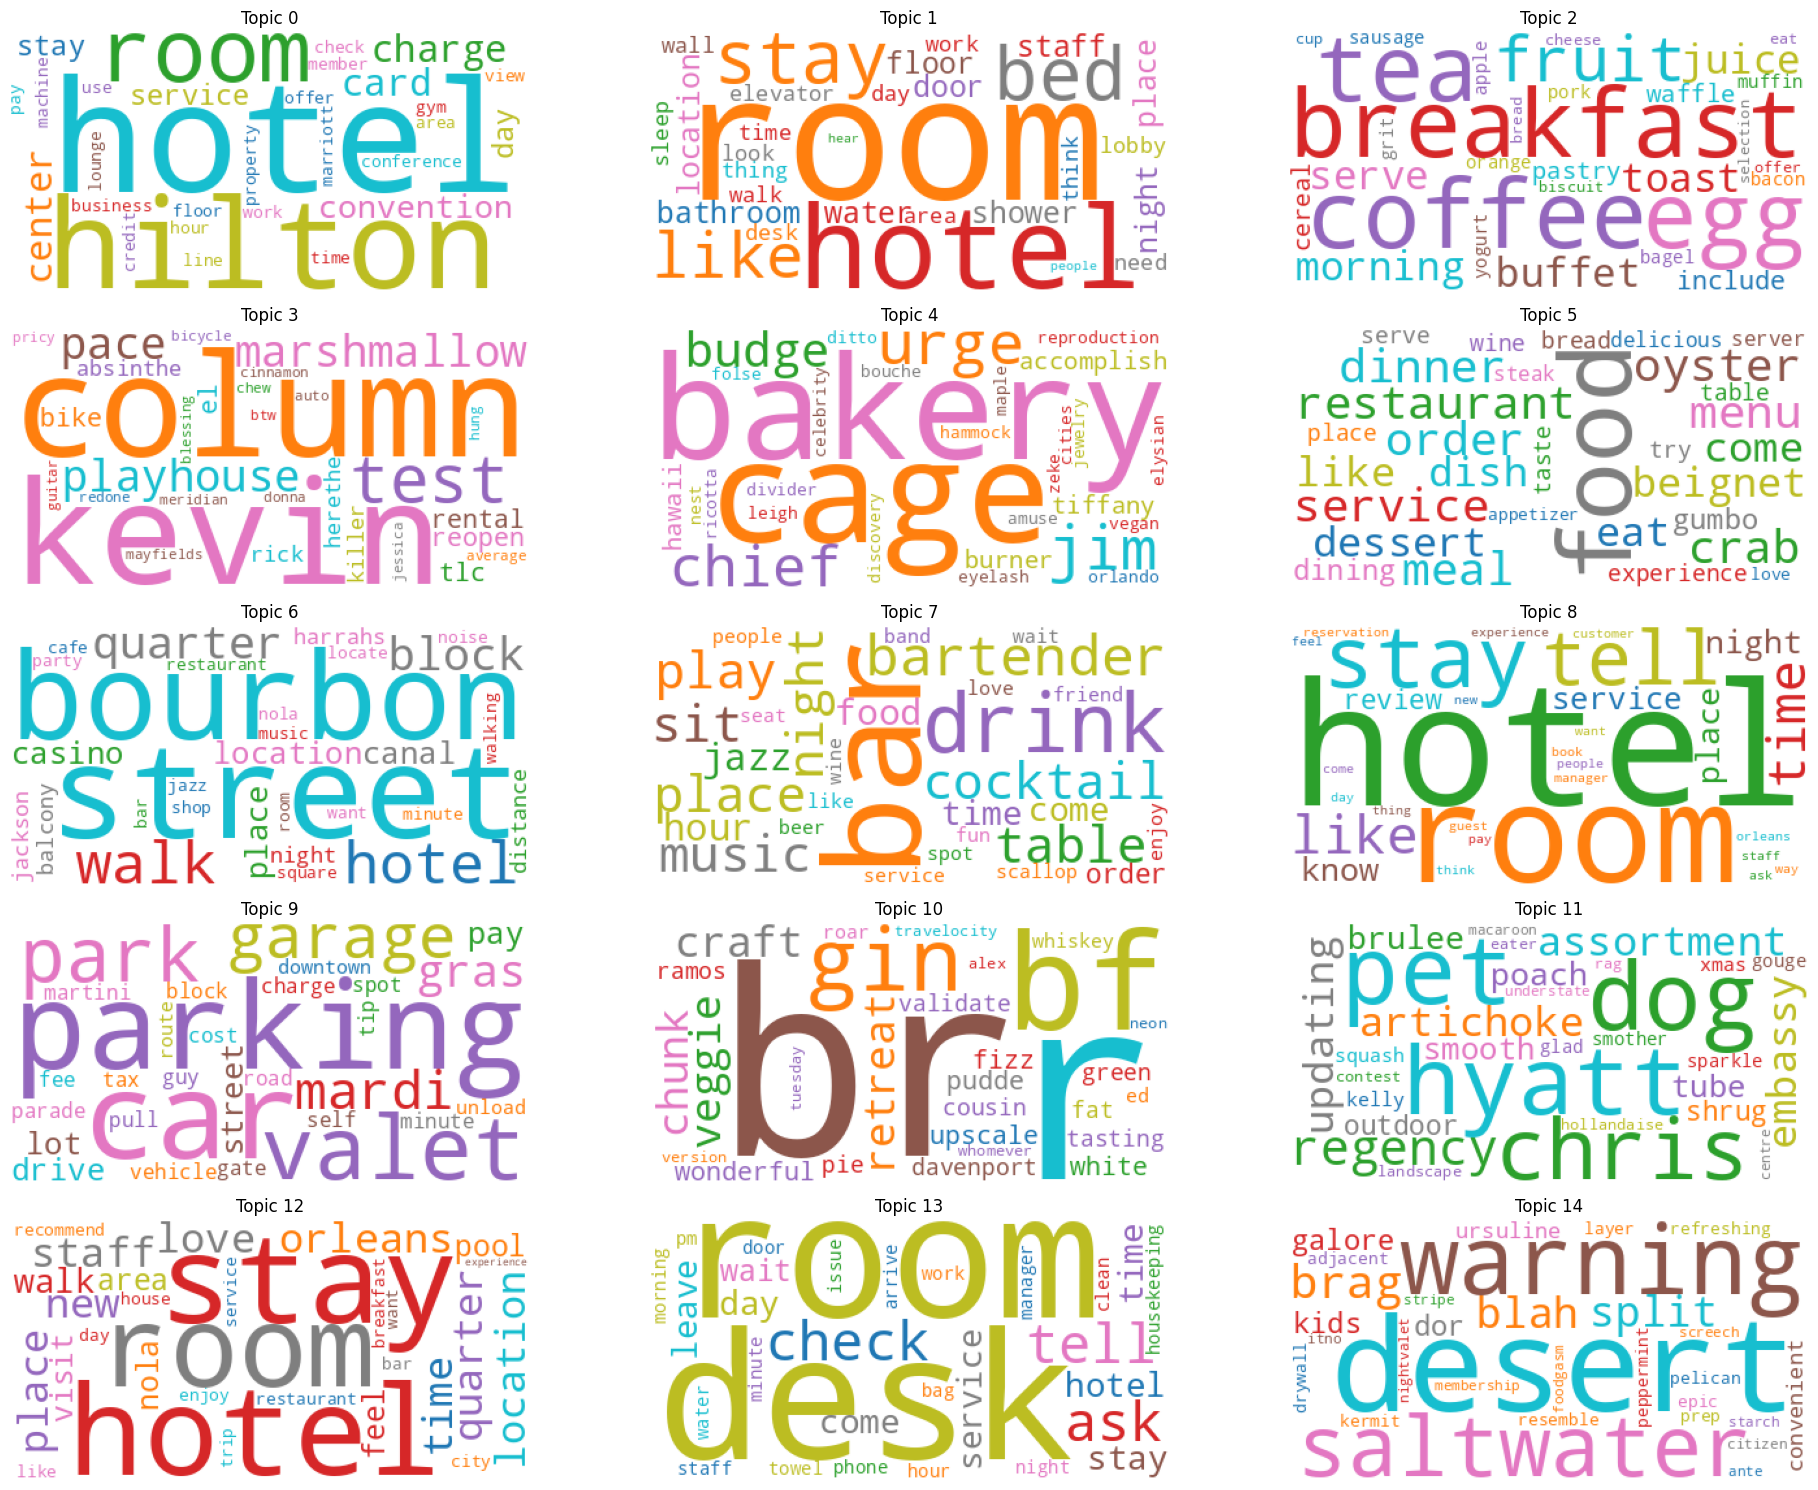

In [53]:
import warnings
warnings.filterwarnings('ignore')
def worCloudPertopic(model, numTopic, row, col):
    cloudLda = WordCloud(stopwords=stop_words,
                    background_color='white',
                    max_words=100,
                    colormap='tab10')


    fig, axes = plt.subplots(row,col, figsize=(20,15), sharex=True, sharey=True)
    fig.tight_layout()
    for i, ax in enumerate(axes.flatten()):
        fig.add_subplot(ax)
        topic_words = " ".join(x[0] for x in model.show_topics(numTopic,formatted=False, num_words=30)[i][1])
        cloudLda.generate(topic_words)
        plt.gca().imshow(cloudLda)
        plt.gca().set_title('Topic ' + str(i))
        plt.gca().axis('off')


    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()

worCloudPertopic(lda_model, ldaTopicNum, 5, 3)

In [54]:
for i in range(0,ldaTopicNum):
    print("Topic : ", i)
    print(" ".join(x[0] for x in lda_model.show_topics(ldaTopicNum,formatted=False, num_words=10)[i][1]))

Topic :  0
hotel hilton room charge card center convention service stay day
Topic :  1
room hotel stay bed like bathroom floor night door shower
Topic :  2
breakfast coffee egg tea fruit morning buffet juice toast serve
Topic :  3
column kevin test marshmallow pace playhouse reopen rental tlc el
Topic :  4
bakery cage urge jim chief budge accomplish tiffany burner hawaii
Topic :  5
food restaurant order service meal menu crab oyster dinner beignet
Topic :  6
street bourbon walk hotel quarter block location casino place canal
Topic :  7
bar drink bartender cocktail table music sit place play night
Topic :  8
hotel room stay tell like time night place know service
Topic :  9
parking car valet park garage mardi gras drive pay street
Topic :  10
br r bf gin craft chunk veggie retreat upscale wonderful
Topic :  11
dog hyatt pet chris regency artichoke embassy updating assortment poach
Topic :  12
hotel stay room orleans new staff quarter place location love
Topic :  13
room desk check tell 

In [55]:
# import and instantiate the vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

# apply the vectorizer to the corpus
idfVector = vectorizer.fit_transform(open_businesses['text_lemmatized'].astype(str))

# display the document-term matrix
vocab = vectorizer.get_feature_names_out()
print(idfVector.shape)
vocab

(14609, 1576)


array(['able', 'abnormal', 'abnoxious', ..., 'wrong', 'yearspredictable',
       'young'], dtype=object)

In [56]:
from sklearn.decomposition import LatentDirichletAllocation
feature_names =  vectorizer.get_feature_names_out()

lda = LatentDirichletAllocation(
        n_components=ldaTopicNum,
        max_iter=20
)
lda.fit_transform(idfVector.toarray())

array([[0.01604821, 0.01604834, 0.01604819, ..., 0.01604825, 0.0160482 ,
        0.01604819],
       [0.02778735, 0.36486776, 0.02778734, ..., 0.02778734, 0.27389681,
        0.02778734],
       [0.01992717, 0.01992717, 0.01992732, ..., 0.01992718, 0.01992719,
        0.01992717],
       ...,
       [0.01760235, 0.01760233, 0.01760234, ..., 0.01760236, 0.01760234,
        0.01760234],
       [0.02227327, 0.02227328, 0.02227344, ..., 0.02227329, 0.02227328,
        0.02227331],
       [0.02354064, 0.02354087, 0.02354067, ..., 0.02354066, 0.02354064,
        0.02354062]])

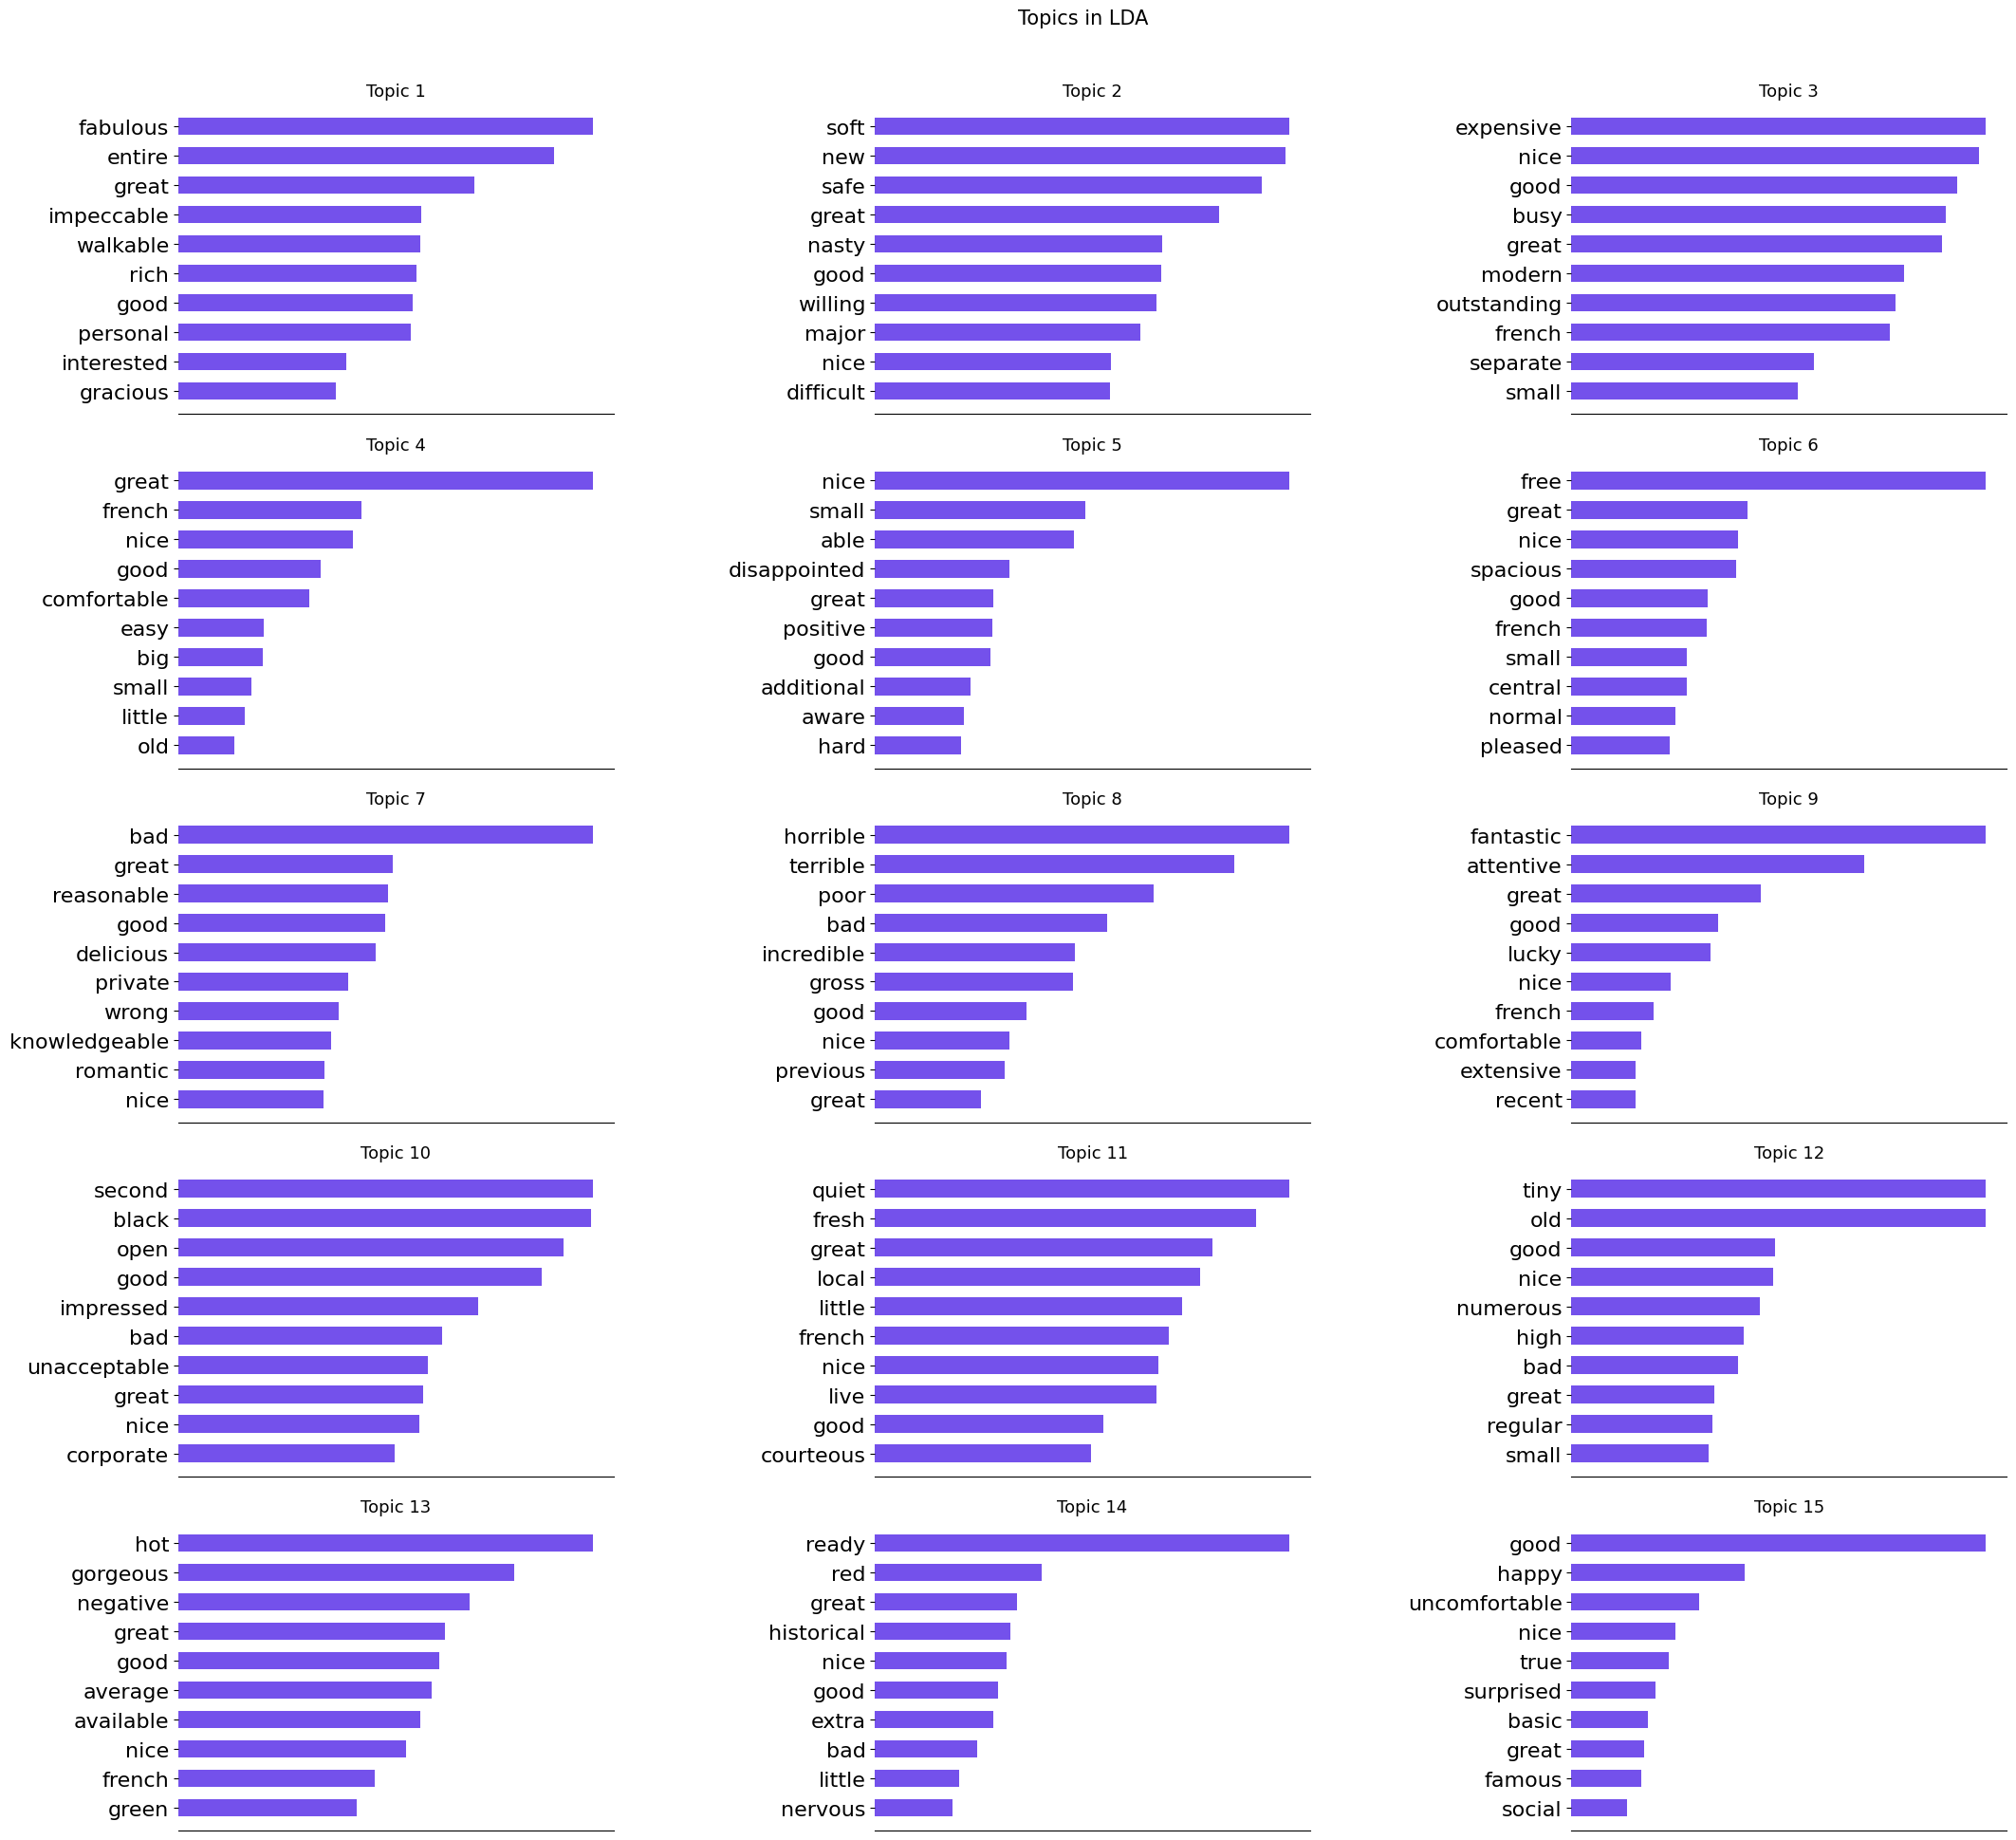

In [57]:
def plot_top_words(model, feature_names, n_top_words, title, row, col):
    #Modified from SKlearn
    fig, axes = plt.subplots(row,col, figsize=(20, 20))
    fig.tight_layout()
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.6, color="#7451eb")
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 13})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=16)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=15)
        ax.tick_params(bottom=False)
        ax.set(xticklabels=[])

    plt.subplots_adjust(top=0.93, bottom=0.02, wspace=0.6, hspace=0.14)
    plt.show()

plot_top_words(lda, feature_names, 10,'Topics in LDA', 5,3)

In [58]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))


display_topics(lda, feature_names, 10)

Topic 0:
fabulous entire great impeccable walkable rich good personal interested gracious
Topic 1:
soft new safe great nasty good willing major nice difficult
Topic 2:
expensive nice good busy great modern outstanding french separate small
Topic 3:
great french nice good comfortable easy big small little old
Topic 4:
nice small able disappointed great positive good additional aware hard
Topic 5:
free great nice spacious good french small central normal pleased
Topic 6:
bad great reasonable good delicious private wrong knowledgeable romantic nice
Topic 7:
horrible terrible poor bad incredible gross good nice previous great
Topic 8:
fantastic attentive great good lucky nice french comfortable extensive recent
Topic 9:
second black open good impressed bad unacceptable great nice corporate
Topic 10:
quiet fresh great local little french nice live good courteous
Topic 11:
tiny old good nice numerous high bad great regular small
Topic 12:
hot gorgeous negative great good average available ni

In [59]:
from gensim.models.coherencemodel import CoherenceModel

# Calculate coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=open_businesses['token_lda'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print("Coherence Score:", coherence_lda)


Coherence Score: 0.55436427486164


In [71]:
from gensim.models import ldamodel
from gensim.corpora.dictionary import Dictionary

dictionary = Dictionary(closed_businesses['token_lda'])
corpus_bow = [dictionary.doc2bow(text) for text in closed_businesses['token_lda']]

In [72]:
[[(dictionary[id], freq) for id, freq in cp] for cp in corpus_bow[:1]]

[[('bar', 1),
  ('bartender', 2),
  ('bourbon', 1),
  ('change', 1),
  ('day', 1),
  ('drink', 1),
  ('end', 1),
  ('flanagan', 1),
  ('greet', 1),
  ('hang', 1),
  ('listen', 1),
  ('local', 1),
  ('music', 1),
  ('overthetop', 1),
  ('people', 1),
  ('place', 1),
  ('pub', 1),
  ('punk', 1),
  ('quarter', 1),
  ('regular', 1),
  ('rock', 1),
  ('stop', 1),
  ('stumble', 1),
  ('talk', 1),
  ('time', 1),
  ('tourist', 1),
  ('vacation', 1)]]

In [84]:
ldaTopicNum = 15

In [85]:
lda_model = ldamodel.LdaModel(corpus=corpus_bow, # Stream of document vectors or sparse matrix of shape (num_documents, num_terms)
                                id2word=dictionary, # Mapping from word IDs to words. It is used to determine the vocabulary size, as well as for debugging and topic printing.
                                num_topics=ldaTopicNum, # The number of requested latent topics to be extracted from the training corpus.
                                passes=10, #Number of passes through the corpus during training
                                per_word_topics=True) # computes a list of topics, sorted in descending order of most likely topics for each word, along with their phi values multiplied by the feature length

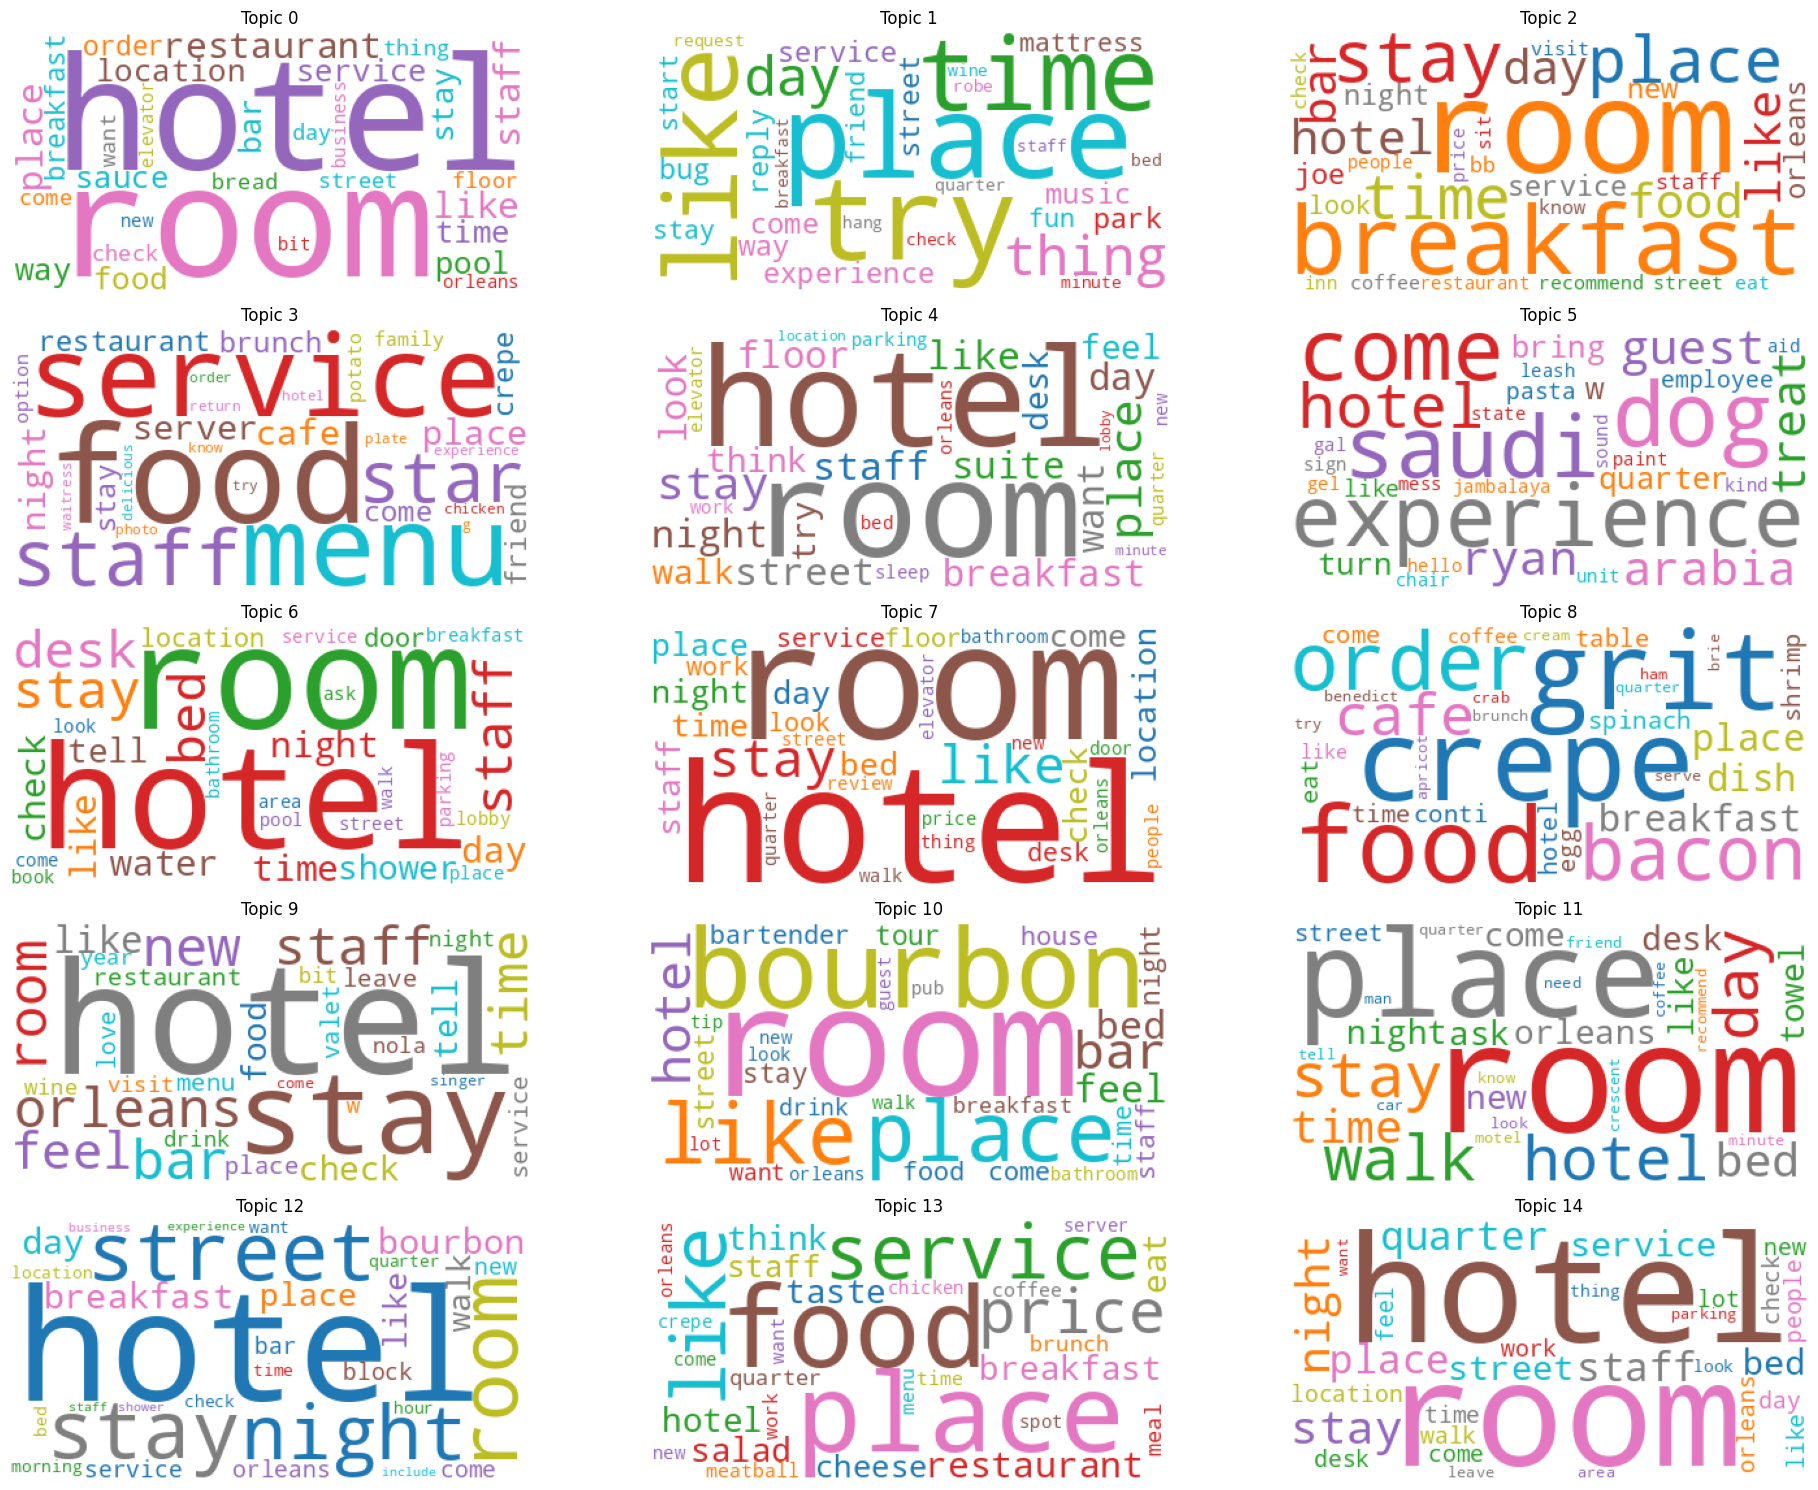

In [86]:
import warnings
warnings.filterwarnings('ignore')
def worCloudPertopic(model, numTopic, row, col):
    cloudLda = WordCloud(stopwords=stop_words,
                    background_color='white',
                    max_words=100,
                    colormap='tab10')


    fig, axes = plt.subplots(row,col, figsize=(20,15), sharex=True, sharey=True)
    fig.tight_layout()
    for i, ax in enumerate(axes.flatten()):
        fig.add_subplot(ax)
        topic_words = " ".join(x[0] for x in model.show_topics(numTopic,formatted=False, num_words=30)[i][1])
        cloudLda.generate(topic_words)
        plt.gca().imshow(cloudLda)
        plt.gca().set_title('Topic ' + str(i))
        plt.gca().axis('off')


    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()

worCloudPertopic(lda_model, ldaTopicNum, 5, 3)

In [87]:
for i in range(0,ldaTopicNum):
    print("Topic : ", i)
    print(" ".join(x[0] for x in lda_model.show_topics(ldaTopicNum,formatted=False, num_words=10)[i][1]))

Topic :  0
room hotel restaurant place like staff location sauce bar service
Topic :  1
place try time like thing day experience park service music
Topic :  2
room breakfast stay place time hotel food like bar day
Topic :  3
food service menu staff star place night server cafe brunch
Topic :  4
room hotel stay place night like street staff breakfast look
Topic :  5
dog experience saudi come hotel guest arabia ryan treat quarter
Topic :  6
room hotel stay staff desk bed night time water like
Topic :  7
room hotel stay like night time place location bed staff
Topic :  8
crepe grit food order bacon cafe breakfast dish place spinach
Topic :  9
hotel stay orleans room new bar staff time feel like
Topic :  10
room bourbon place like bar hotel feel bed stay street
Topic :  11
room place walk stay hotel day time bed night new
Topic :  12
hotel stay room street night breakfast bourbon day place like
Topic :  13
food place service like price restaurant breakfast salad hotel eat
Topic :  14
room 

In [88]:
# import and instantiate the vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

# apply the vectorizer to the corpus
idfVector = vectorizer.fit_transform(closed_businesses['text_lemmatized'].astype(str))

# display the document-term matrix
vocab = vectorizer.get_feature_names_out()
print(idfVector.shape)
vocab

(1578, 602)


array(['able', 'academic', 'acceptable', 'accesible', 'accessible',
       'actual', 'additional', 'adjustable', 'admirable', 'adorable',
       'advanced', 'adventurous', 'aesthetic', 'affected', 'affordable',
       'african', 'aggressive', 'alcoholic', 'alive', 'allyoucan',
       'ambitious', 'american', 'amorous', 'angry', 'annual', 'anxious',
       'apologetic', 'appalachian', 'appalled', 'appologetic',
       'appreciative', 'apprehensive', 'architectural', 'aromatic',
       'arrive', 'arrogant', 'artificial', 'asian', 'atraditional',
       'atrocious', 'attentive', 'attic', 'attractive', 'atypical',
       'authentic', 'automatic', 'available', 'average', 'aware', 'bad',
       'basic', 'bearable', 'belgian', 'big', 'billion', 'black',
       'boisterous', 'british', 'broad', 'budgetconscious', 'busy',
       'caressafeconshorrible', 'casual', 'cautious', 'cavernous',
       'central', 'ceramic', 'certain', 'chaotic', 'chic', 'chopittous',
       'choppy', 'civil', 'classic'

In [89]:
from sklearn.decomposition import LatentDirichletAllocation
feature_names =  vectorizer.get_feature_names_out()

lda = LatentDirichletAllocation(
        n_components=ldaTopicNum,
        max_iter=20
)
lda.fit_transform(idfVector.toarray())

array([[0.02824801, 0.028248  , 0.02824803, ..., 0.02824803, 0.02824802,
        0.6045277 ],
       [0.0216755 , 0.0216755 , 0.02167553, ..., 0.02167558, 0.0216755 ,
        0.02167553],
       [0.01868605, 0.01868616, 0.0186861 , ..., 0.01868613, 0.01868606,
        0.01868611],
       ...,
       [0.02284662, 0.68014706, 0.02284664, ..., 0.02284661, 0.02284661,
        0.02284661],
       [0.02518379, 0.02518387, 0.02518382, ..., 0.0251854 , 0.02518381,
        0.02518382],
       [0.02270805, 0.68209603, 0.0227074 , ..., 0.02270744, 0.02270738,
        0.02270736]])

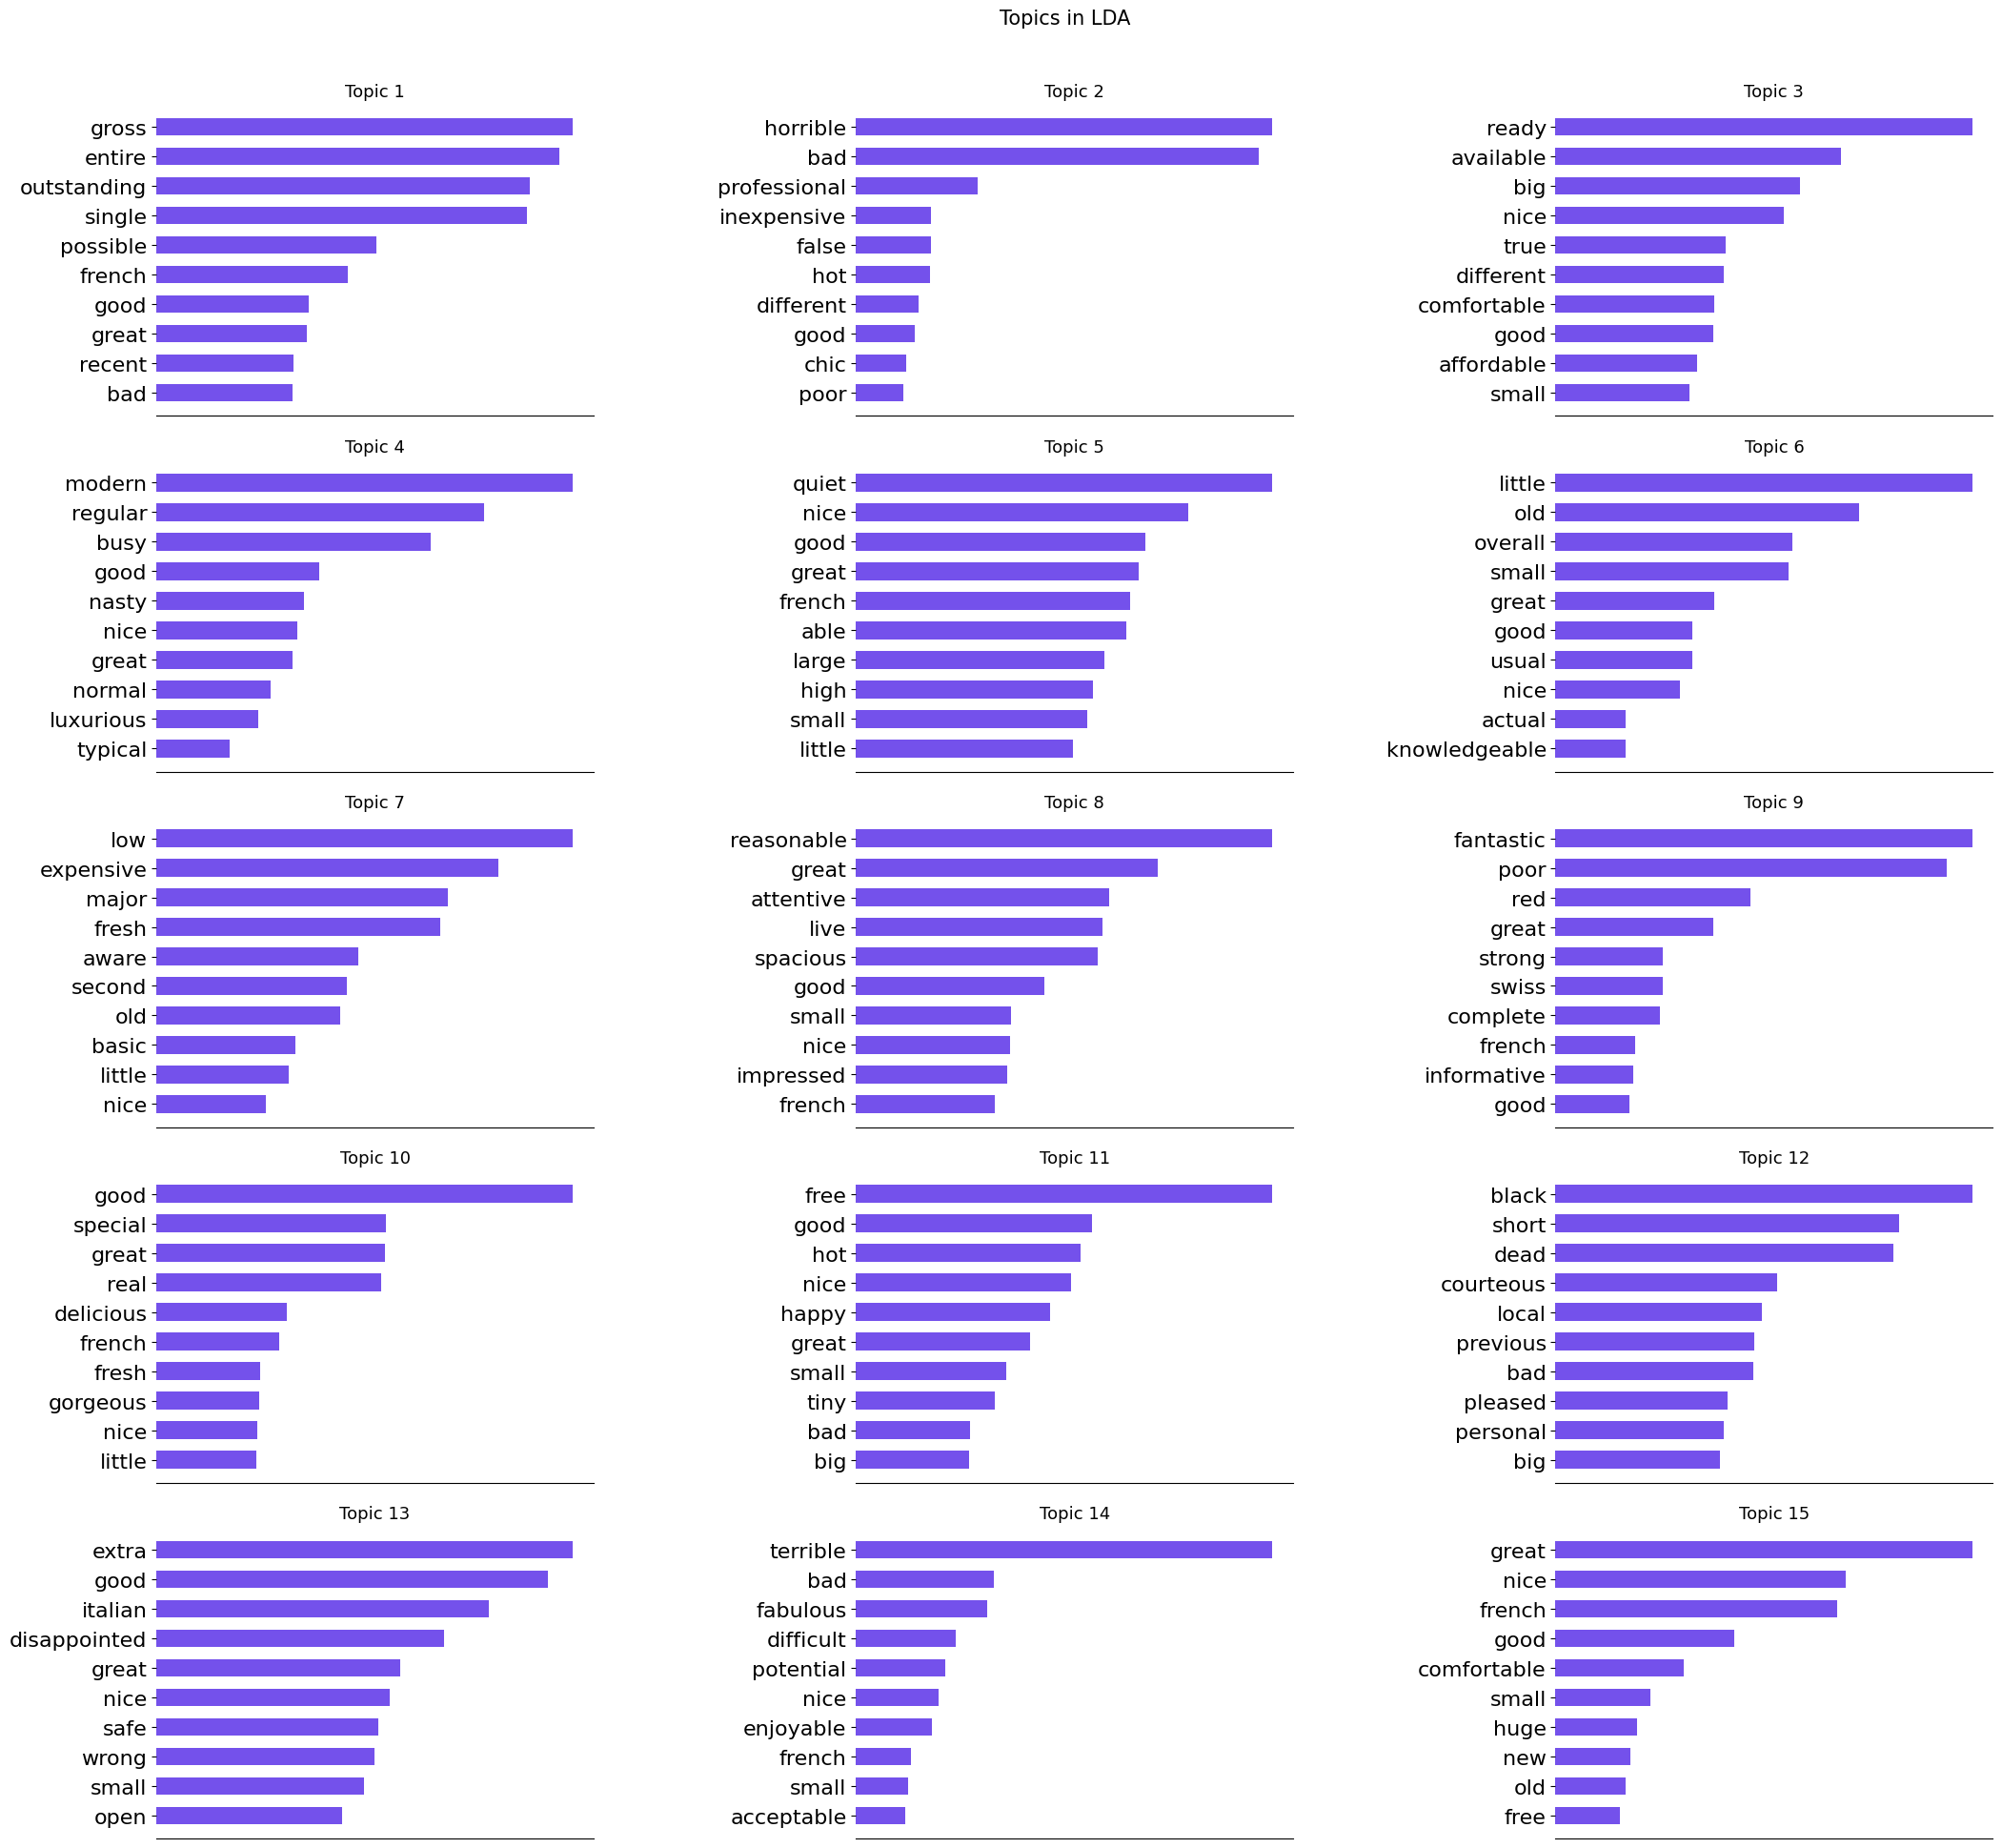

In [90]:
def plot_top_words(model, feature_names, n_top_words, title, row, col):
    #Modified from SKlearn
    fig, axes = plt.subplots(row,col, figsize=(20, 20))
    fig.tight_layout()
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.6, color="#7451eb")
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 13})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=16)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=15)
        ax.tick_params(bottom=False)
        ax.set(xticklabels=[])

    plt.subplots_adjust(top=0.93, bottom=0.02, wspace=0.6, hspace=0.14)
    plt.show()

plot_top_words(lda, feature_names, 10,'Topics in LDA', 5,3)

In [91]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))


display_topics(lda, feature_names, 10)

Topic 0:
gross entire outstanding single possible french good great recent bad
Topic 1:
horrible bad professional inexpensive false hot different good chic poor
Topic 2:
ready available big nice true different comfortable good affordable small
Topic 3:
modern regular busy good nasty nice great normal luxurious typical
Topic 4:
quiet nice good great french able large high small little
Topic 5:
little old overall small great good usual nice actual knowledgeable
Topic 6:
low expensive major fresh aware second old basic little nice
Topic 7:
reasonable great attentive live spacious good small nice impressed french
Topic 8:
fantastic poor red great strong swiss complete french informative good
Topic 9:
good special great real delicious french fresh gorgeous nice little
Topic 10:
free good hot nice happy great small tiny bad big
Topic 11:
black short dead courteous local previous bad pleased personal big
Topic 12:
extra good italian disappointed great nice safe wrong small open
Topic 13:
terr

In [92]:
from gensim.models.coherencemodel import CoherenceModel

# Calculate coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=closed_businesses['token_lda'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print("Coherence Score:", coherence_lda)


Coherence Score: 0.31808262977656254


In [93]:
closed_businesses

index             business_id                   name  \
9          9  Hh-LHf0bUYoyOnm3DITuXw         Flanagan's Pub   
10        10  Hh-LHf0bUYoyOnm3DITuXw         Flanagan's Pub   
15        15  NZG9a_jMy5e6jC8TrDvP7Q            Holiday Inn   
32        32  TZodoH7csDIwQ5EfWqqsJw  Bourbon Orleans Hotel   
51        51  Hh-LHf0bUYoyOnm3DITuXw         Flanagan's Pub   
...      ...                     ...                    ...   
14832  14844  DW6z8cXBxI6XLdjJK_yHJQ   Rodeway Inn & Suites   
14988  15001  DW6z8cXBxI6XLdjJK_yHJQ   Rodeway Inn & Suites   
15579  15592  DW6z8cXBxI6XLdjJK_yHJQ   Rodeway Inn & Suites   
15912  15925  DW6z8cXBxI6XLdjJK_yHJQ   Rodeway Inn & Suites   
16010  16024  DW6z8cXBxI6XLdjJK_yHJQ   Rodeway Inn & Suites   

                    address         city state  postal_code   latitude  \
9          625 St Philip St  New Orleans    LA      70116.0  29.960361   
10         625 St Philip St  New Orleans    LA      70116.0  29.960361   
15             124 Royal St  New Orleans    LA      70130.0  29.953442   
32           717 Orleans St  New Orleans    LA      70116.0  29.958764   
51         625 St Philip St  New Orleans    LA      70116.0  29.960361   
...                     ...          ...   ...          ...        ...   
14832  8400 I-10 Service Rd  New Orleans    LA      70127.0  30.029281   
14988  8400 I-10 Service Rd  New Orleans    LA      70127.0  30.029281   
15579  8400 I-10 Service Rd  New Orleans    LA      70127.0  30.029281   
15912  8400 I-10 Service Rd  New Orleans    LA      70127.0  30.029281   
16010  8400 I-10 Service Rd  New Orleans    LA      70127.0  30.029281   

       longitude  stars_x  ...  funny  cool  \
9     -90.062059      4.0  ...    0.0   0.0   
10    -90.062059      4.0  ...    0.0   0.0   
15    -90.068800      3.0  ...    0.0   0.0   
32    -90.064729      3.5  ...    0.0   0.0   
51    -90.062059      4.0  ...    0.0   1.0   
...          ...      ...  ...    ...   ...   
14832 -89.991795      2.0  ...    0.0   1.0   
14988 -89.991795      2.0  ...    1.0   0.0   
15579 -89.991795      2.0  ...    0.0   0.0   
15912 -89.991795      2.0  ...    3.0   7.0   
16010 -89.991795      2.0  ...    0.0   0.0   

                                                    text                 date  \
9      We were vacationing in the French Quarter for ...  2010-10-07 21:34:07   
10     I love this little place.  It's a dive bar ful...  2010-03-15 19:44:38   
15     good value for the price because of it's locat...  2011-08-25 00:53:33   
32     Great French Quarter location, especially afte...  2008-08-19 22:26:35   
51     When I'm in the quarter, I always like to stop...  2011-04-25 20:34:02   
...                                                  ...                  ...   
14832  This place is a dump. The furniture was staine...  2018-07-15 15:11:38   
14988  DO NOT STAY HERE, STAY AWAY!!! I decided to bo...  2016-05-17 07:21:44   
15579  Do NOT stay here. We reserved two rooms and wh...  2013-07-30 21:21:51   
15912  No need to get deep here, it was what it was. ...  2019-06-25 18:43:26   
16010  STAY AWAY! If I could give ZERO stars I would....  2019-07-06 16:20:16   

                                         text_punct_reml  \
9      We were vacationing in the French Quarter for ...   
10     I love this little place  Its a dive bar full ...   
15     good value for the price because of its locati...   
32     Great French Quarter location especially after...   
51     When Im in the quarter I always like to stop i...   
...                                                  ...   
14832  This place is a dump The furniture was stained...   
14988  DO NOT STAY HERE STAY AWAY I decided to book t...   
15579  Do NOT stay here We reserved two rooms and whe...   
15912  No need to get deep here it was what it was A ...   
16010  STAY AWAY If I could give ZERO stars I would T...   

                                              text_lower  languages  \
9      we were vacationing in t

In [94]:
open_businesses

index             business_id                                  name  \
0          0  cxupofYLq46bxBHpKyFwsQ  Wyndham New Orleans - French Quarter   
1          1  cxupofYLq46bxBHpKyFwsQ  Wyndham New Orleans - French Quarter   
2          2  hkh5iyDeGLNhu-JUQFRE1Q             Royal Sonesta New Orleans   
3          3  hkh5iyDeGLNhu-JUQFRE1Q             Royal Sonesta New Orleans   
4          4  hkh5iyDeGLNhu-JUQFRE1Q             Royal Sonesta New Orleans   
...      ...                     ...                                   ...   
16182  16197  I_FKWKPVpGts4q_HzJ-0mQ         The Ritz-Carlton, New Orleans   
16183  16198  UIwItjBCjCKF4nDNVBzVIQ        Super 8 by Wyndham New Orleans   
16184  16199  h1J_GWV5yZ-gXUtsplvI8g                 Omni Riverfront Hotel   
16185  16200  u-wkhjV7CfvGJVY7hGULjw          Hilton New Orleans Riverside   
16186  16201  u-wkhjV7CfvGJVY7hGULjw          Hilton New Orleans Riverside   

                                          address         city state  \
0                                124 Royal Street  New Orleans    LA   
1                                124 Royal Street  New Orleans    LA   
2                                  300 Bourbon St  New Orleans    LA   
3                                  300 Bourbon St  New Orleans    LA   
4                                  300 Bourbon St  New Orleans    LA   
...                                           ...          ...   ...   
16182                                921 Canal St  New Orleans    LA   
16183  6322 Chef Menteur Highway, I-10 Exit 240 B  New Orleans    LA   
16184                  701 Convention Center Blvd  New Orleans    LA   
16185                                2 Poydras St  New Orleans    LA   
16186                                2 Poydras St  New Orleans    LA   

       postal_code   latitude  longitude  stars_x  ...  funny  cool  \
0          70130.0  29.953713 -90.068526      3.0  ...    1.0   1.0   
1          70130.0  29.953713 -90.068526      3.0  ...    0.0   0.0   
2          70130.0  29.955761 -90.067887      3.5  ...    0.0   1.0   
3          70130.0  29.955761 -90.067887      3.5  ...    0.0   0.0   
4          70130.0  29.955761 -90.067887      3.5  ...    1.0   0.0   
...            ...        ...        ...      ...  ...    ...   ...   
16182      70112.0  29.955041 -90.071079      4.0  ...    0.0   0.0   
16183      70126.0  30.010096 -90.014538      3.5  ...    0.0   1.0   
16184      70130.0  29.945554 -90.064893      3.5  ...    8.0   3.0   
16185      70130.0  29.947506 -90.063454      3.0  ...    0.0   0.0   
16186      70130.0  29.947506 -90.063454      3.0  ...    1.0   1.0   

                                                    text                 date  \
0      This hotel is bad, borderline mediocre. Of cou...  2014-08-24 19:33:12   
1      Had booked rooms a month in advance for a bach...  2014-03-14 20:25:53   
2      This hotel seems very nice in the lobby, but t...  2012-09-10 18:42:46   
3      Understand first that this was a party trip wi...  2012-12-05 19:22:23   
4      A group of 12 girls and I came here for a Bach...  2014-09-25 15:57:00   
...                                                  ...                  ...   
16182  I am very glad that I stayed here on my recent...  2018-12-30 14:57:47   
16183  We booked this hotel for me and my bestie to s...  2019-03-10 18:40:51   
16184  Since this hotel is right across the street fr...  2014-12-07 21:14:07   
16185  We stayed at the Hilton New Orleans Riverside ...  2019-07-11 17:21:00   
16186  Update time....in town for the Yelpy Awards an...  2013-02-24 20:17:06   

                                         text_punct_reml  \
0      This hotel is bad borderline mediocre Of cours...   
1      Had booked rooms a month in advance for a bach...   
2      This hotel seems very nice in the lobby but th...   
3      Understand first that this was a party trip wi...   
4      A group of 12 girls and I came here for a Bach...   
...                